<a href="https://colab.research.google.com/github/aniusoro/Uni/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1:
From eClass, download the dataset Pokemon.csv. This data set presents statistics for each of the Pokemon characters in the popular video game franchise “Pokemon.”
For the variable HP, calculate the following statistics:

Median
Mean
20% Trimmed Mean
Standard Deviation
20% Winsorized Standard Deviation

In [ ]:
pokemonData = read.csv("Pokemon.csv")
install.packages("WRS2")
library(WRS2)

hp = pokemonData$hp
# The mean of the hp data
round(mean(hp), digits = 3)
# The median
median(hp)
# 20% trimmed mean
round(mean(hp, tr=0.2), digits = 3)
# Standard deviation
round(sd(hp), digits = 3)
# 20% Windsorized Standard deviation
winsorized_sd = sqrt(winvar(hp, tr=0.2))
round(winsorized_sd, digits = 3)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘mvtnorm’, ‘reshape’, ‘plyr’, ‘mc2d’




[1] 68.959

[1] 65

[1] 66.096

[1] 26.576

[1] 14.442

Question 2:
Without using the R function mad(), list the values considered outliers for the untransformed Pokemon HP data according to the MAD-median rule for outlier detection.
When listing the outliers, only display the following columns: “pokedex_number”, “name”, and “hp”.


In [ ]:
# Find the median
med = median(hp)

# Find the deviations from the median
devs = hp - med

# Find the absolute median deviations
abs_devs = abs(devs)

# Find the median of the abs_devs to get the MAD statistic
MAD = median(abs_devs)

# MADN
MADN = MAD / 0.6745
round(MADN, digits = 3)

# Extreacting the outliers by pokedex_number, name and hp
pokemonData$hp_outliers = (abs_devs / MADN) > 2.24
outliers = subset(pokemonData, hp_outliers == TRUE)
outliers[c("pokedex_number", "name", "hp")]




[1] 22.239

,pokedex_number,name,hp
,<int>,<chr>,<int>
39,39,Jigglypuff,115
40,40,Wigglytuff,140
50,50,Diglett,10
113,113,Chansey,250
131,131,Lapras,130
134,134,Vaporeon,130
143,143,Snorlax,160
171,171,Lanturn,125
202,202,Wobbuffet,190


Question 3:
Use the following sampled data to answer questions a - h.
−62,−98,−82,−83,−93,−91,−102,−91,−89,−103,−72,−99,−81,−116,

−97,−78,−104,−101,−92,−88,−111,−90,−76,−83,−122,−108,−101,

−130,−84,−83,−92,−98,−89,−102,−104

a. Determine if it is reasonable to assume that the population is normally distributed
**Answer: I do no believe that it is reasonable to assume that the data is normally distributed because the mean should be a negative number not 0 and the standard deviation cannot then be 1**

In [ ]:
q3_data = c(-62, -98, -82, -83, -93, -91, -102, -91, -89, -103, -72, -99, -81, -116,
-97, -78, -104, -101, -92, -88, -111, -90, -76, -83, -122, -108, -101, -130, -84,
-83, -92, -98, -89, -102, -104)


b. Without using the functions mean(), var(), or sd(), calculate the sample size, mean, standard deviation, and standard error of the mean.

In [ ]:
# Sample size
q3_N = length(q3_data)

# Sample Mean
q3_sum = sum(q3_data)
q3_mean = q3_sum / q3_N
round(q3_mean, digits = 3)

# Sample Standard Deviation
q3_deviations = q3_data - q3_mean

# Sum of the square of deviations
q3_sum_squared_deviations = sum(q3_deviations^2)

# Variance
q3_var = q3_sum_squared_deviations / (q3_N - 1 )

# Standard deviation
q3_SD = sqrt(q3_var)
round(q3_SD, digits = 3)

#Standard error
q3_SE = sqrt(q3_var) / sqrt(q3_N)
round(q3_SE, digits = 3)


[1] -94.143

[1] 13.948

[1] 2.358

c. Find the critical values that represent the middle 95% boundries on a t-distribution.


In [ ]:
# for the middle 95% it means alpha is 0.05
alpha = 0.05
q3_df = q3_N - 1
left_tail = qt(alpha/2, q3_df)
right_tail = qt(alpha/2, q3_df, lower.tail = FALSE)
round(left_tail, digits = 3)
round(right_tail, digits = 3)

[1] -2.032

[1] 2.032

d. If H0:μ=−90, calculate a 95% confidence interval to test this hypothesis. Do you reject the hypothesis (explain your reasoning in terms of the confidence interval)? You are not permitted to use the function t.test().

**Answer: Since our test statistic falls within the 95% confidence interval, we fail to reject the null hypothesis.**

In [ ]:
q3_lower = -94.143 - (2.032* 2.358)
round(q3_lower, digits = 3)
q3_upper = -94.143 + (2.032* 2.358)
round(q3_upper, digits = 3)

[1] -98.934

[1] -89.352

e. If α=0.05, calculate a p-value to test H0:μ=−90. Do you reject the hypothesis? You are not permitted to use the function t.test().
**Answer: since q3_pt > alpha, we fail to reject the null hypothesis.**

In [ ]:
q3_pt = pt(q3_test_statistic, df = q3_df)
round((q3_pt * 2), digits = 3)

[1] 0.088

f. Use the function t.test() to compute a confidence interval and a p-value. α=0.05

In [ ]:
t.test(q3_data, mu = -90, alternative = c("two.sided"))


	One Sample t-test

data:  q3_data
t = -1.7572, df = 34, p-value = 0.08788
alternative hypothesis: true mean is not equal to -90
95 percent confidence interval:
 -98.93405 -89.35166
sample estimates:
mean of x 
-94.14286 


g. Repeat question e. testing H0:μ>−90. You are not permitted to use the function t.test().
**Answer: we reject this null hypothesis**

h. Use the function t.test() to test the hypothesis H0:μ>−90. α=0.05

In [ ]:
t.test(q3_data, mu = -90, alternative = c("less"))


	One Sample t-test

data:  q3_data
t = -1.7572, df = 34, p-value = 0.04394
alternative hypothesis: true mean is less than -90
95 percent confidence interval:
      -Inf -90.15635
sample estimates:
mean of x 
-94.14286 


Question 4: If you get a sample mean of 45 based on 25 participants and the sample standard deviation is 5, what is the 95% confidence interval? Assume random sampling from a normal distribution.
**Answer: the 95% confidence interval is (43.04, 46.96)**

In [ ]:
# H0 : μ > -90
# H1 : μ < -90
# Find the test statistic:
H0 = -90
q3_test_statistic = (q3_mean - H0) / q3_SE
q3_test_statistic

# one tailed
# rejection region is to the left
left_one_tail = qt(alpha, df= q3_df)
left_one_tail

pt(q3_test_statistic, df = q3_df)


[1] -1.757244

[1] -1.690924

[1] 0.04393941

In [ ]:
# lower end

lower = 45 - (1.96*(5/sqrt(25)))
upper = 45 + (1.96*(5/sqrt(25)))
lower 
upper

[1] 43.04

[1] 46.96

Question 5:
Repeat the previous question, except compute a 99% confidence interval.
**Answer: the 99% confidence interval is (42.42, 47.58)**

In [ ]:
lower2 = 45 - (2.58*(5/sqrt(25)))
upper2 = 45 + (2.58*(5/sqrt(25)))
lower2
upper2

[1] 42.42

[1] 47.58

Question 6:
A manufacturer claims that its light bulbs have an average life span of μ=1200 hours. You randomly test 36 bulbs and find that the average life span is x¯=1150 with a standard deviation of 25. Does a 95% confidence interval suggest that the manufacter’s claim is unreasonable? Assume random sampling from a normal distribution.

**Answer: this is quite unreasonable because we are 95% from our sample that life span should fal between (1141.833, 1158.167) and their claim does not**

In [ ]:
manu_lower = 1150 - (1.96*(25/sqrt(36)))
manu_upper = 1150 + (1.96*(25/sqrt(36)))
round(manu_lower, digits = 3)
round(manu_upper, digits = 3)

[1] 1141.833

[1] 1158.167

Question 7:
If N=10 observations are randomly sampled from a normal distribution with μ=9 and σ=8, what is the mean and standard deviation of the sampling distribution of the mean?

In [ ]:
# mean 
# the mean of the sampling distribution will be the same as the expected mean.
q7_mean = 9
q7_mean

# standard deviation 
q7_sd = 8 / sqrt(10)
round(q7_sd, digits = 3)

[1] 9

[1] 2.53

Question 8:
What is the variance of the sampling distribution from the previous question? Hint: recall how standard deviations are calculated.

In [ ]:
q7_var = q7_sd ^ 2
q7_var

[1] 6.4

Question 9:
Given that x¯=78, s=25, N=10, and α=0.05, test the hypothesis that H0:μ>80. Assume observations are randomly sampled from a normal distribution.
Make sure to report:

the test statistic
degrees of freedom
p-value
whether your reject or fail to reject the H0


In [ ]:
# H0 : μ > 80
# H1 : μ < 80

q9_H0 = 80
q9_mean = 78
q9_sd = 25
q9_N = 10 
q9_alpha = 0.05

# Standard error
q9_se = q9_sd / sqrt(q9_N)
round(q9_se, digits = 3)

# test statistic
q9_test_stat = (q9_mean - q9_H0 ) / q9_se
round(q9_test_stat, digits = 3)

# Degrees of freedom
q9_df = q9_N - 1
q9_df

# critical value
q9_crit = qt(q9_alpha, df = q9_df)
round(q9_crit, digits = 3)

# p value
q9_pval = pt(q9_test_stat, df = q9_df)
round(q9_pval, digits = 3)

# since the p value is less then alpha, we reject the null hypothesis.


[1] 7.906

[1] -0.253

[1] 9

[1] -1.833

[1] 0.403

Question 10:
Repeat the previous question, but test H0:μ=80.

In [ ]:
# H0 : μ = 80
# H1 : μ != 80

q10_H0 = 80
q10_mean = 78
q10_sd = 25
q10_N = 10 
q10_alpha = 0.05

# df
q10_df = q10_N - 1

# Standard error
q10_se = q10_sd / sqrt(q10_N)
round(q10_se, digits = 3)

# test statistic
q10_test_stat = (q10_mean - q10_H0 ) / q10_se
round(q10_test_stat, digits = 3)

# critical values
q10_lt = qt(q10_alpha/2, df= q10_df)
round(q10_lt, digits = 3)
q10_rt = qt(q10_alpha/2, df= q10_df, lower.tail = FALSE)
round(q10_rt, digits = 3)

# p value
q10_pvalue = pt(q10_test_stat, df = q10_df) * 2
q10_pvalue
# we fail to reject the null hypothesis


[1] 7.906

[1] -0.253

[1] -2.262

[1] 2.262

[1] 0.8059656

Question 11:
Compute a 95% confidence interval for the previous question. Does it conform to your decision about the hypothesis H0:μ=80?

In [ ]:
q11_lower = 78 - (1.96*(25/sqrt(10)))
q11_upper = 78 + (1.96*(25/sqrt(10)))
round(q11_lower, digits = 3)
round(q11_upper, digits = 3)

# yes it confirms my decision to fail to reject the null hypothesis.
# this is because 80 falls comfortably within the 95% CI

[1] 62.505

[1] 93.495

Question 12:
On eClass you will find a data set called MaleBody.csv. It contains the physical measurements of 252 males (Homo sapiens). Evaluate whether the percentage body fat using Brozek’s equation (457/Density - 414.2), which is given by the column ‘body.fat’, is normally distrubuted.
**Answer, this is not normally distributed**

[1] 18.93849

[1] 7.750856

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



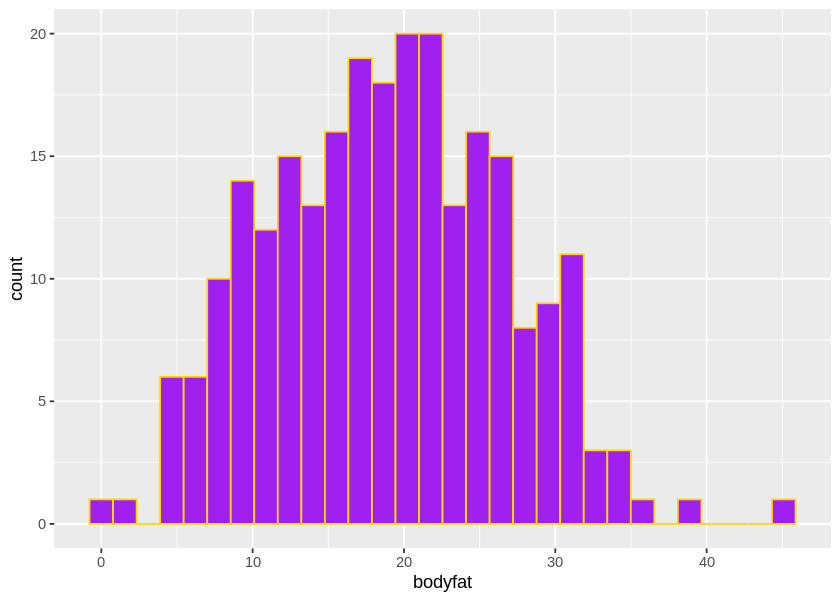

In [ ]:
maledata = read.csv("MaleBody.csv")
bodyfat = maledata$body.fat
mean(bodyfat)
sd(bodyfat)
library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(maledata, aes(x = bodyfat))+
  geom_histogram(color = "gold", fill = "purple")

Question 13:
On eClass you will find a data set called AllTimeMovies.csv. It contains the top 79 all-time movies as of 2003 by domestic (US) gross receipts. Evaluate whether domestic (US) gross is normally distrubuted.
**Answer: the gross data is not normally distributed**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



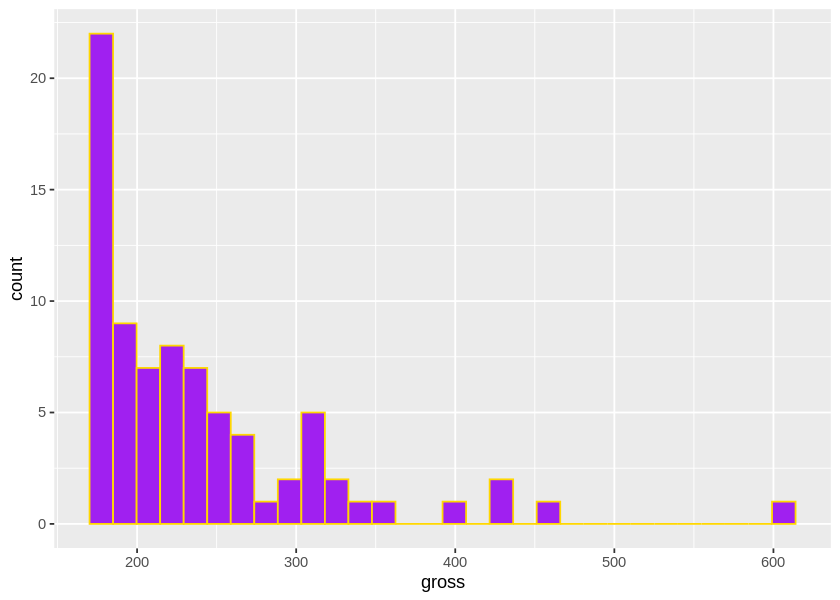

In [ ]:
moviedata = read.csv("AllTimeMovies.csv")
gross = moviedata$Gross

library(ggplot2)
options(repr.plot.width = 7, repr.plot.height = 5)
ggplot(moviedata, aes(x = gross))+
  geom_histogram(color = "gold", fill = "purple")